In [1]:
import keras

Using TensorFlow backend.


In [0]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files

In [5]:
file=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
import io

In [0]:
dataset=pd.read_csv(io.BytesIO(file['Churn_Modelling.csv']))

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


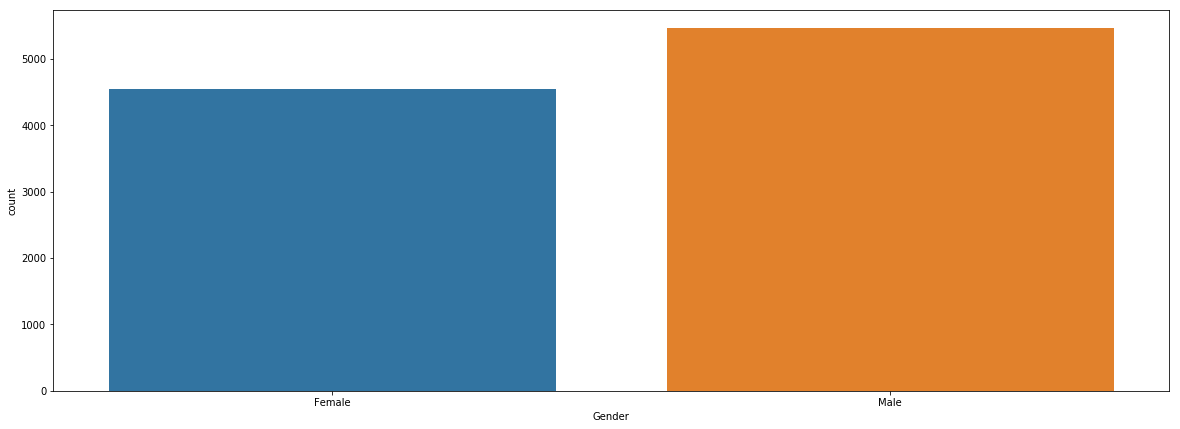

In [69]:
plt.figure(figsize=(20,7))
sns.countplot(dataset['Gender'])
plt.show()

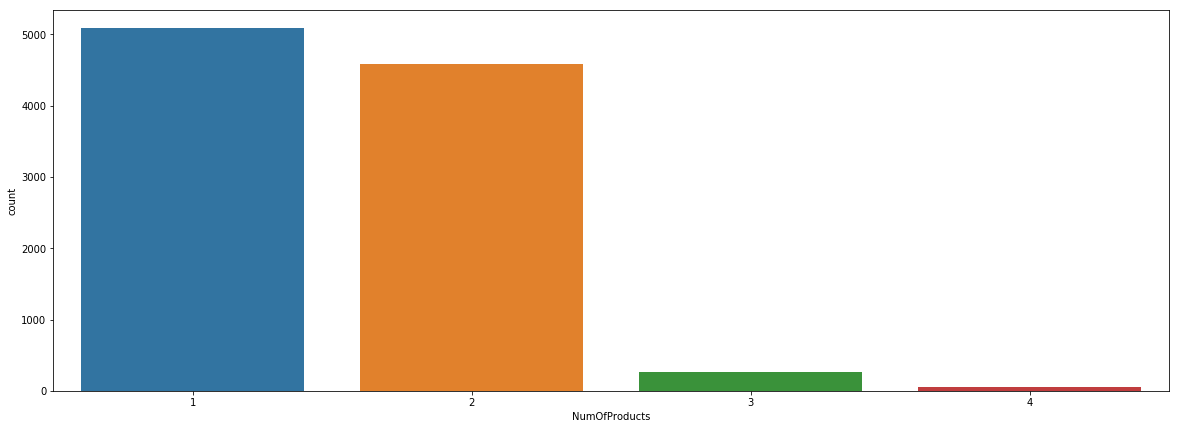

In [70]:
plt.figure(figsize=(20,7))
sns.countplot(dataset['NumOfProducts'])
plt.show()

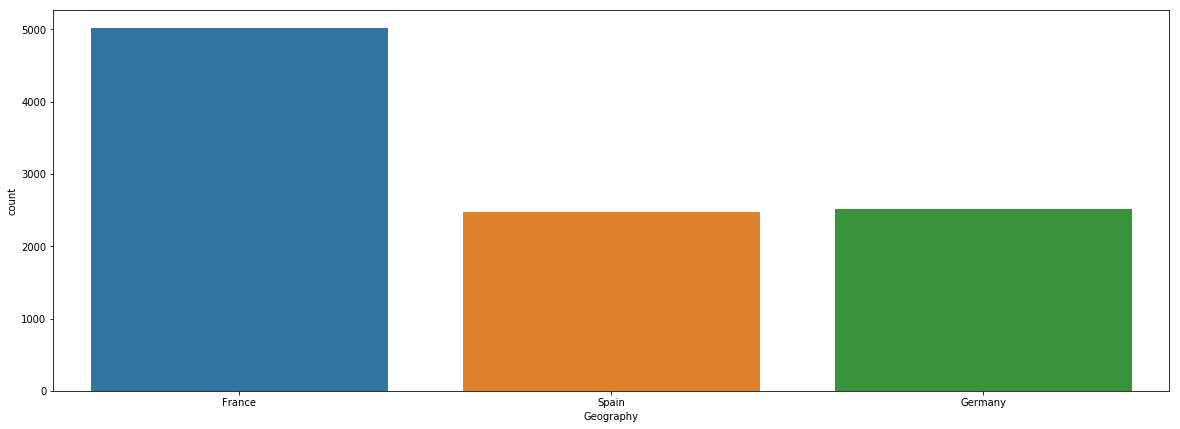

In [67]:
plt.figure(figsize=(20,7))
sns.countplot(dataset['Geography'])
plt.show()

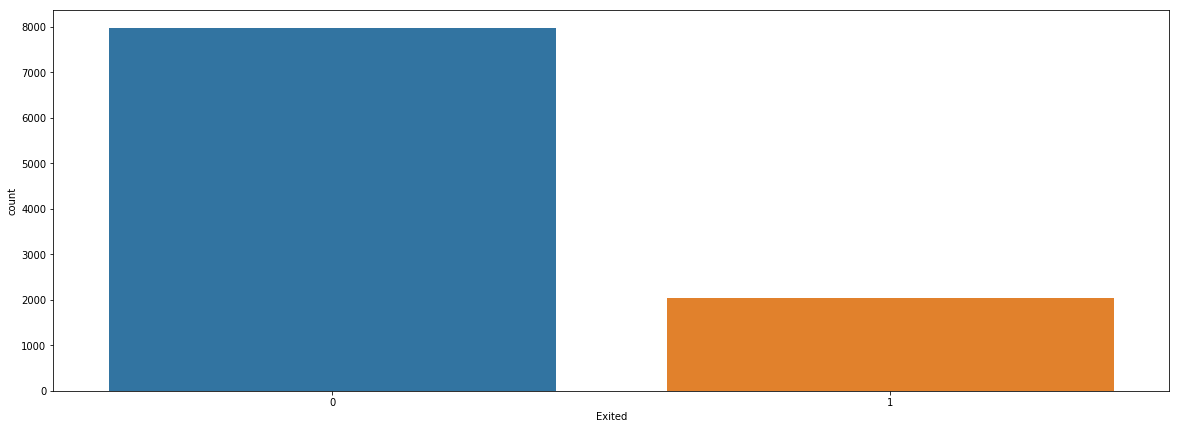

In [66]:
plt.figure(figsize=(20,7))
sns.countplot(dataset['Exited'])
plt.show()

In [0]:
x=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
label_encoder_1=LabelEncoder()
x[:,1]=label_encoder_1.fit_transform(x[:,1])

In [0]:
label_encoder_2=LabelEncoder()
x[:,2]=label_encoder_2.fit_transform(x[:,2])

In [36]:
one_hot_encoder=OneHotEncoder(categorical_features=[1])
x=one_hot_encoder.fit_transform(x).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
x=x[:,1:]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
classifier=Sequential()

In [44]:
classifier.add(Dense(output_dim=6, kernel_initializer='uniform', activation = 'relu', input_dim=11))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=11, units=6)`
  """Entry point for launching an IPython kernel.


In [45]:
classifier.add(Dense(output_dim=6, kernel_initializer='uniform', activation ='relu'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=6)`
  """Entry point for launching an IPython kernel.


In [46]:
classifier.add(Dense(output_dim=1, kernel_initializer='uniform', activation = 'sigmoid'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
classifier.fit( x_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4849 - acc: 0.7947
Epoch 2/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4288 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 105us/step - loss: 0.4228 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4186 - acc: 0.8161
Epoch 5/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4161 - acc: 0.8257
Epoch 6/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4144 - acc: 0.8305
Epoch 7/100
8000/8000 [==============================] - 1s 105us/step - loss: 0.4130 - acc: 0.8320
Epoch 8/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.4120 - acc: 0.8307
Epoch 9/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.4107 - acc: 0.8325
Epoch 10/100
8000/8000 [==============================] - 1s 113us/step - loss: 0.4098 - acc: 0.8327

In [0]:
y_pred=classifier.predict(x_test)

In [0]:
y_pred=(y_pred>0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred=y_pred,y_true=y_test)

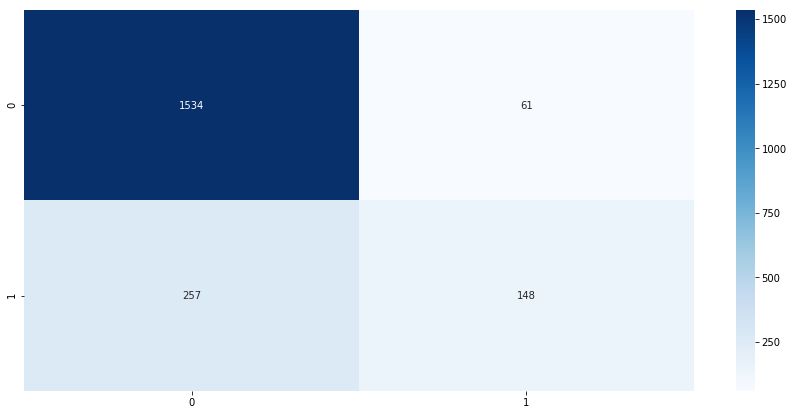

In [68]:
plt.figure(figsize=(15,7))
sns.heatmap(cm,cmap='Blues',annot=True,fmt='g')
plt.show()